In [1]:
from reservoir_c import *
import time
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

Alphabet: A B C D E F G _

here


/home/artur/Dropbox/Conceptors/Task1_Recognition/runSyllClassScripts/functions.py:81: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean(error**2,axis=1)/combinedVar)


[  8.96484384e-08   1.62158373e-07   1.15787887e-07   1.65166976e-07
   2.97638370e-07   8.97054583e-08              nan]
9.53856432517e-08


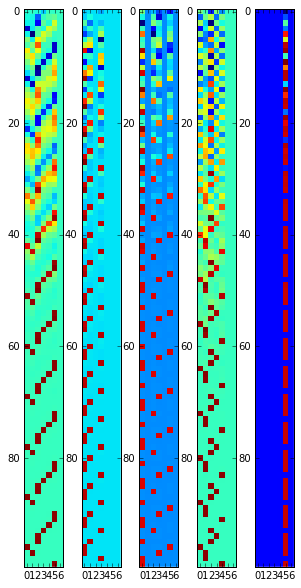

In [2]:
abc = np.zeros([8,7])
abc[1:,:][np.where(np.eye(7)==1)] = 1

n_seq = 5
tott = 1100
patterns = []
patt = np.zeros((tott,7))

seq = []
for i in range(n_seq):
    s = np.random.randint(1,7, size = np.random.randint(4,9))
    s = np.append(s,0)
    seq.append(s)

    for t in range(tott):
        patt[t] = abc[s[t%len(s)]]

    patterns.append(np.copy(patt))

A = Reservoir(N = 500)
A.run(patterns)

A.recall()
# functions.plot_interpolate_1d(patterns, A.Y_recalls)

gs = gridspec.GridSpec(1,n_seq)
plt.figure(figsize=(5,10))
for i in range(n_seq):
    plt.subplot(gs[i])
    plt.imshow(A.Y_recalls[i][:100], interpolation='none')

In [3]:
import pickle
with open('data.pkl','rb') as f:
    data = pickle.load(f)
print(data.keys())

dict_keys(['"one_of_two1"', '"?"', '"BuRA"', '"Omo Ranch Rd 2"', '"RYA"', '"CAVIWest11 of little house"', '"AYO"', '"CAVI West Workshop 12"', '"Mumford Bar Trail 6"', '"Mumford Bar Trail 8"', '"CAVI North Workshop 12"', '"YAW"', '"Mosquito Ridge 4"', '"New unbanded"', '"Unbanded East"', '"Mumford Bar Trail 2"', '"GAY"', '"GRA"', '"Omo Ranch Rd 4"', '"Omo Ranch Rd 1"', '"Mosquito Ridge 3"', '"CAVIFTANN-Mine10"', '"CAVIMine 12"', '"AGBk"', '"two CAVI"', '"Mosquito Ridge 2"', '"Mumford Bar Trail 4"', '"Mumford Bar Trail 9"', '"North South Rd 1"', '"CAVIEast11 of Little house"', '"UpperSpring CAVI12"', '"Mosquito Ridge 1"', '"YBuA"', '"Mumford Bar Trail 5"', '"Gate CAVI"', '"ORA"', '"Mumford Bar Trail 3"', '"Sailor Flat"', '"WABk"', '"Omo Ranch Rd 3"', '"CAVIFTANN-Spingr10"', '"AOBu"', '"CAVIFTANN-LSpr12"', '"CAVI East Workshop 12"', '"Mumford Bar Trail 7"', '"AGO"', '"Mumford Bar Trail 1"', '"two_males"', '"Meadow"', '"CAVI"'])


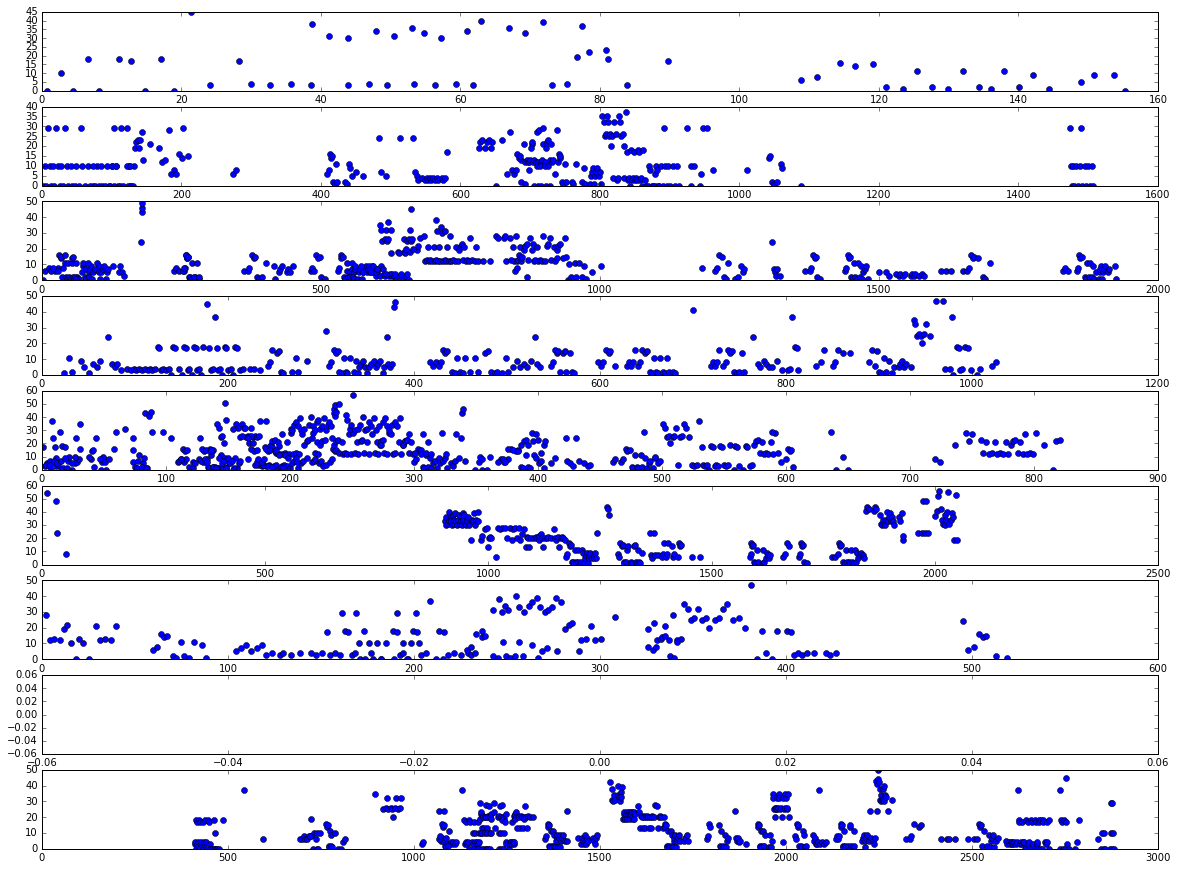

In [4]:
import collections
import operator

sylsdat = data['"YBuA"']
keys = sylsdat.keys()
syls = []
syll = []
for k in keys:
    syls.append(sylsdat[k])
    syll = syll + sylsdat[k]
    
for i in range(len(syll)):
    syll[i] = syll[i][0]
    
counter=collections.Counter(syll)
sorted_counter = sorted(counter.items(), key=operator.itemgetter(1))

alphabet = dict()
for i in range(len(sorted_counter)):
    alphabet.update({sorted_counter[-(i+1)][0]:i})

gs = gridspec.GridSpec(len(syls),1)
plt.figure(figsize=(20,15))
    
for i in range(len(syls)):
    syl_arr = np.zeros((2,len(syls[i])))
    for t in range(len(syls[i])):
        syl_arr[0,t] = alphabet[syls[i][t][0]]
        syl_arr[1,t] = syls[i][t][1]
    plt.subplot(gs[i])
    plt.plot(syl_arr[1],syl_arr[0], 'o')

# plt.figure(figsize=(20,5))
# plt.plot(syl_arr, 'o')